# MSCS 634 – Project Deliverable 1
**Project:** Advanced Data Mining for Data-Driven Insights and Predictive Modeling  
**Author:** Komalben Suthar  
**Date:** November 2025  

---

## Dataset Overview
**Dataset Name:** Customer Experience Dataset for AI-Driven Optimization  
**Source:** Simulated dataset (synthetic data)  
**Records:** 1,000  
**Features:** 10+ attributes including:
- **Customer Demographics:** Age, Gender, Location
- **Interaction Data:** Number of Interactions, Feedback Score, Products Purchased
- **Behavioral Data:** Products Viewed, Time Spent on Website
- **Satisfaction & Retention:** Satisfaction Score, Retention Status

**Why this dataset?**
- Simulates real-world customer behavior
- Large enough for regression, classification, clustering, and association rule mining
- Provides actionable insights for customer experience optimization

---

## Data Cleaning & Preparation
- **Missing Values:** Checked and imputed numerical features with median, categorical features with mode
- **Duplicates:** Removed duplicates to maintain data integrity
- **Outliers:** Detected via boxplots and histograms; handled by capping/removal
- **Feature Engineering (planned for next deliverable):**
  - Engagement Rate = Time_Spent_on_Site / (Num_Interactions + 1)
  - Purchase-to-View Ratio = Products_Purchased / (Products_Viewed + 1)
- **Categorical Encoding:** One-hot encoding applied for `Gender` and `Location`

---

## Exploratory Data Analysis (EDA)
- **Distribution Plots:** To examine feature distributions
- **Boxplots:** To identify outliers
- **Correlation Heatmap:** To observe relationships between features
- **Pairplots:** To explore feature interactions

**Insights:**
- Higher engagement correlates with higher retention and satisfaction
- Age and location may influence customer behavior
- Interaction metrics strongly correlate with purchases
- These insights guide feature selection and modeling in subsequent deliverables

---

## Challenges & Solutions
- **Missing Data:** Used median/mode imputation
- **Outliers:** Applied visual and statistical thresholds to avoid data skew
- **Categorical Features:** One-hot encoding while avoiding multicollinearity

---


In [5]:
# Deliverable 1: Data Preprocessing & Exploration
# Dataset: Customer Experience Dataset for AI-Driven Optimization

# ------------------------------
# Import libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plotting style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)





In [6]:
# ------------------------------
# Step 1: Load dataset
# ------------------------------
data = pd.read_csv('/content/drive/MyDrive/Komal/MSCS_634_Project/customer_experience_data.csv')

# Quick glance at first 5 rows
display(data.head())


,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [7]:
# ------------------------------
# Step 2: Dataset Overview
# ------------------------------
# Info about data types, null values, memory usage
display(data.info())

# Statistical summary for numerical columns
display(data.describe())

# Count missing values in each column
display(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

None

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


In [8]:

# ------------------------------
# Step 3: Handle Missing Values
# ------------------------------
# Numeric columns: fill missing with mean
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

# Categorical columns: fill missing with mode
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [9]:
# ------------------------------
# Step 4: Encode Categorical Variables
# ------------------------------
# One-hot encoding for Gender and Location
data_encoded = pd.get_dummies(data, columns=['Gender', 'Location'], drop_first=True)

# Encode Retention_Status
data_encoded['Retention_Status_Encoded'] = data_encoded['Retention_Status'].apply(lambda x: 1 if x == 'Retained' else 0)

# Drop the original 'Retention_Status' column
data_encoded = data_encoded.drop('Retention_Status', axis=1)

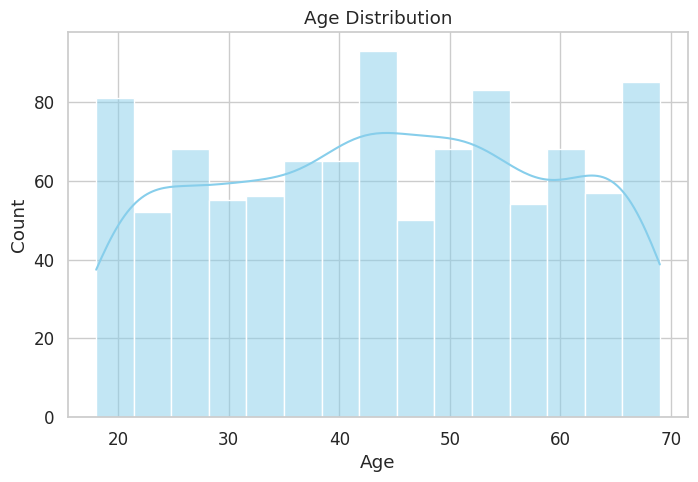

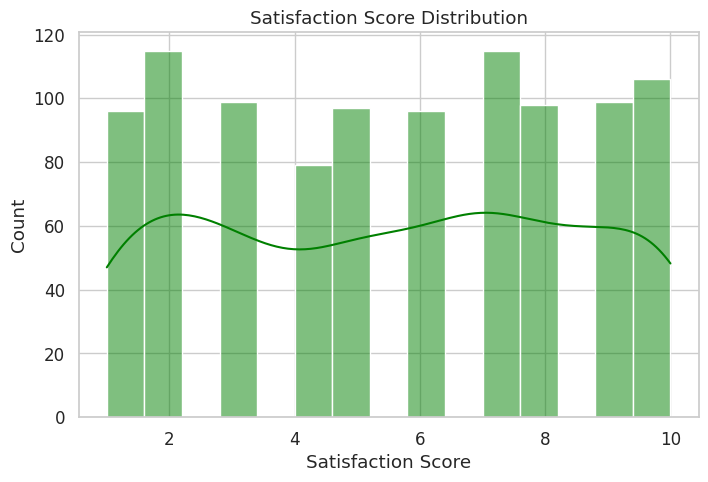

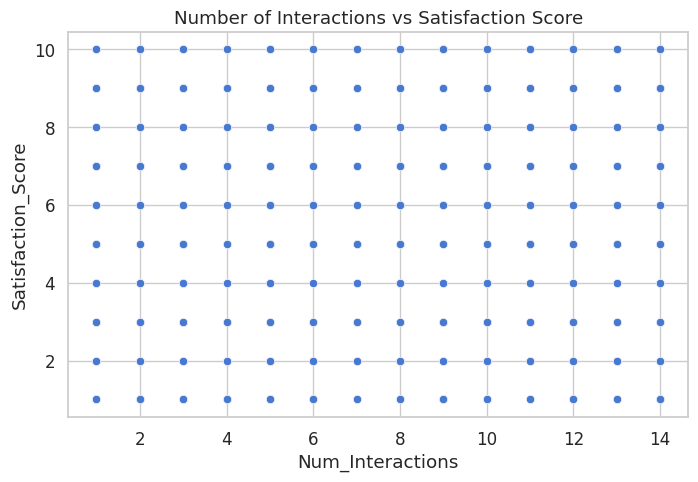

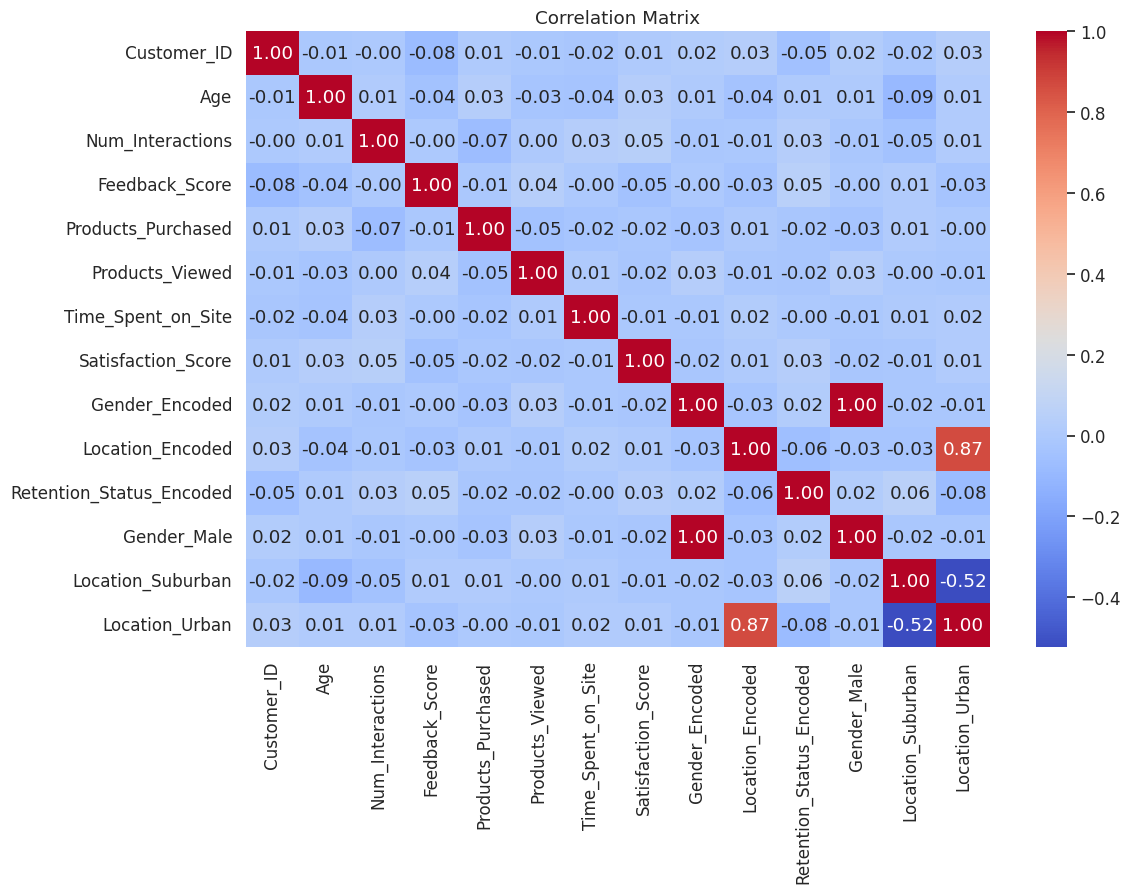

In [10]:

# ------------------------------
# Step 5: Exploratory Data Analysis (EDA)
# ------------------------------

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Satisfaction Score distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Satisfaction_Score'], bins=15, kde=True, color='green')
plt.title('Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

# Num_Interactions vs Satisfaction_Score scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Num_Interactions', y='Satisfaction_Score', data=data)
plt.title('Number of Interactions vs Satisfaction Score')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:



# ------------------------------
# Step 6: Insights
# ------------------------------
# Top correlations with Satisfaction_Score
print("Top features correlated with Satisfaction_Score:")
display(data_encoded.corr()['Satisfaction_Score'].sort_values(ascending=False))

Top features correlated with Satisfaction_Score:


,Satisfaction_Score
Satisfaction_Score,1.000000
Num_Interactions,0.045535
Retention_Status_Encoded,0.032324
Age,0.031561
Location_Urban,0.013227
Location_Encoded,0.007968
Customer_ID,0.006414
Time_Spent_on_Site,-0.007485
Location_Suburban,-0.012879
Products_Purchased,-0.016324
